In [1]:
import matplotlib.pyplot as plt
from datetime import timedelta, date
import pandas as pd
import numpy as np


### https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

In [2]:
covid_url = ("https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7")

#### We choose Paris (75) as department
#### We choose to study the evolution of covid in the last 30 days

In [3]:
wanted_dep = '75'
STUDY_DAYS = 30

In [4]:
df = pd.read_csv(covid_url, sep=";", parse_dates=True, index_col=2)
df

,dep,sexe,hosp,rea,rad,dc
jour,,,,,,
2020-03-18,01,0,2,0,1,0
2020-03-18,01,1,1,0,1,0
2020-03-18,01,2,1,0,0,0
2020-03-18,02,0,41,10,18,11
2020-03-18,02,1,19,4,11,6
...,...,...,...,...,...,...
2021-02-06,974,1,19,3,390,28
2021-02-06,974,2,10,0,414,28
2021-02-06,976,0,94,15,643,49


In [5]:
df = df.query("sexe == 0") 
df.drop(columns=["sexe"], inplace=True)
df

,dep,hosp,rea,rad,dc
jour,,,,,
2020-03-18,01,2,0,1,0
2020-03-18,02,41,10,18,11
2020-03-18,03,4,0,1,0
2020-03-18,04,3,1,2,0
2020-03-18,05,8,1,9,0
...,...,...,...,...,...
2021-02-06,971,48,5,804,171
2021-02-06,972,15,3,390,45
2021-02-06,973,36,12,2162,75


In [6]:
print(df["dep"].unique())
print(df["dep"].unique().shape)

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '971' '972'
 '973' '974' '976']
(101,)


In [7]:
last_day = df.tail(1).index[0]
before_day = last_day - timedelta(days = STUDY_DAYS)
print("Evolution from ", before_day, " to ", last_day)

sdf = df.loc[last_day]
pdf = df.loc[before_day]
sdf.reset_index(inplace=True)
pdf.reset_index(inplace=True)


frame = {"dep": sdf["dep"], "prev_hosp": pdf["hosp"], "lastest_hosp": sdf["hosp"]}
frame

Evolution from  2021-01-07 00:00:00  to  2021-02-06 00:00:00


{'dep': 0       01
 1       02
 2       03
 3       04
 4       05
       ... 
 96     971
 97     972
 98     973
 99     974
 100    976
 Name: dep, Length: 101, dtype: object,
 'prev_hosp': 0      267
 1      283
 2      216
 3      141
 4      155
       ... 
 96      50
 97      16
 98      29
 99      45
 100      5
 Name: hosp, Length: 101, dtype: int64,
 'lastest_hosp': 0      233
 1      317
 2      234
 3      182
 4      135
       ... 
 96      48
 97      15
 98      36
 99      30
 100     94
 Name: hosp, Length: 101, dtype: int64}

In [8]:
stats = pd.DataFrame(frame)
stats

,dep,prev_hosp,lastest_hosp
0,01,267,233
1,02,283,317
2,03,216,234
3,04,141,182
4,05,155,135
...,...,...,...
96,971,50,48
97,972,16,15
98,973,29,36
99,974,45,30


In [9]:
stats["Diff"] = stats["lastest_hosp"] - stats["prev_hosp"]
stats["%"] = stats["Diff"] / stats["prev_hosp"] * 100
stats.head()

,dep,prev_hosp,lastest_hosp,Diff,%
0,01,267,233,-34,-12.734082
1,02,283,317,34,12.014134
2,03,216,234,18,8.333333
3,04,141,182,41,29.078014
4,05,155,135,-20,-12.903226


In [10]:
stats.shape

(101, 5)

# Evolution of COVID in the last @days (30)
## Sorted list of departements with decrease of hospitalizations (France)

In [11]:
stats.sort_values('Diff')

,dep,prev_hosp,lastest_hosp,Diff,%
38,38,804,667,-137,-17.039801
69,69,966,844,-122,-12.629400
54,54,464,343,-121,-26.077586
19,21,389,283,-106,-27.249357
74,74,354,251,-103,-29.096045
...,...,...,...,...,...
92,92,732,894,162,22.131148
60,60,341,513,172,50.439883
91,91,533,724,191,35.834897
83,83,338,552,214,63.313609


## Sorted list of departements with increase of hospitalizations (France)

In [12]:
stats.sort_values('Diff', ascending=False)

,dep,prev_hosp,lastest_hosp,Diff,%
12,13,976,1508,532,54.508197
83,83,338,552,214,63.313609
91,91,533,724,191,35.834897
60,60,341,513,172,50.439883
92,92,732,894,162,22.131148
...,...,...,...,...,...
74,74,354,251,-103,-29.096045
19,21,389,283,-106,-27.249357
54,54,464,343,-121,-26.077586
69,69,966,844,-122,-12.629400


## Sorted list of departements with increase of percentage (France)

In [13]:
stats.sort_values('%', ascending=False)

,dep,prev_hosp,lastest_hosp,Diff,%
100,976,5,94,89,1780.000000
29,2B,7,45,38,542.857143
21,23,21,77,56,266.666667
16,17,52,172,120,230.769231
66,66,59,172,113,191.525424
...,...,...,...,...,...
55,55,107,65,-42,-39.252336
90,90,188,113,-75,-39.893617
7,08,183,100,-83,-45.355191
48,48,47,25,-22,-46.808511


## Get Paris's Data

In [14]:
stats.query("dep=='75'")

,dep,prev_hosp,lastest_hosp,Diff,%
75,75,720,848,128,17.777778


In [15]:
df = df.query("dep == @wanted_dep")
df.sort_index(inplace=True)
df

,dep,hosp,rea,rad,dc
jour,,,,,
2020-03-18,75,359,105,40,14
2020-03-19,75,453,122,62,22
2020-03-20,75,575,145,98,30
2020-03-21,75,649,165,122,36
2020-03-22,75,728,195,145,40
...,...,...,...,...,...
2021-02-02,75,826,167,12222,2926
2021-02-03,75,831,177,12269,2938
2021-02-04,75,855,185,12326,2944


<AxesSubplot:xlabel='jour', ylabel='hosp'>

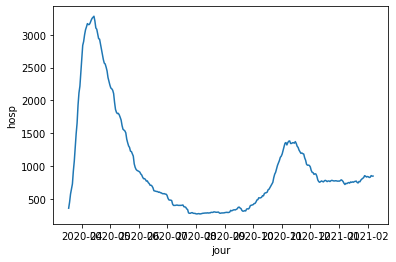

In [16]:
import seaborn as sns
sns.lineplot(x=df.index, y="hosp", data=df)

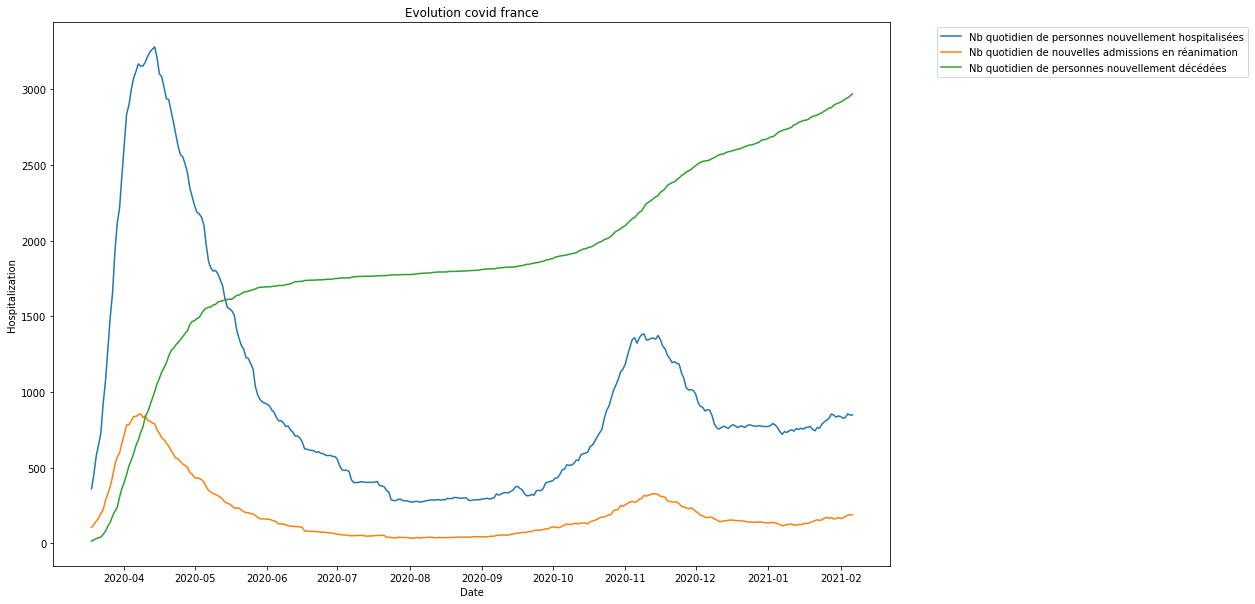

In [17]:
plt.figure(figsize=(15, 10))
plt.title('Evolution covid france')
plt.xlabel('Date')
plt.ylabel('Hospitalization')
plt.plot(df[['hosp', 'rea', 'dc']])
plt.legend(['Nb quotidien de personnes nouvellement hospitalisées', 'Nb quotidien de nouvelles admissions en réanimation', 'Nb quotidien de personnes nouvellement décédées'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Evolution covid france.png',bbox_inches = 'tight')
plt.show()

